<a href="https://colab.research.google.com/github/RehanShabbir16/Intro_to_NLP_using_Tensorflow/blob/main/LSTM_subwords8K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
dataset,info=tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True)
train_dataset,test_dataset=dataset['train'],dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/incomplete.1LP5GR_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/incomplete.1LP5GR_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/incomplete.1LP5GR_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer=info.features['text'].encoder


In [4]:
buffer_size=10000
batch_size=256

train_dataset=train_dataset.shuffle(buffer_size)
train_dataset=train_dataset.padded_batch(batch_size)

In [5]:
test_dataset = test_dataset.padded_batch(batch_size)

In [6]:
# Hyperparameters
embedding_dim = 64
lstm_dim = 64
dense_dim = 64

In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 254ms/step - accuracy: 0.6065 - loss: 0.6434 - val_accuracy: 0.8141 - val_loss: 0.4324
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 238ms/step - accuracy: 0.8622 - loss: 0.3419 - val_accuracy: 0.8277 - val_loss: 0.4166
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 247ms/step - accuracy: 0.8986 - loss: 0.2752 - val_accuracy: 0.8572 - val_loss: 0.3910
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 244ms/step - accuracy: 0.9045 - loss: 0.2713 - val_accuracy: 0.8513 - val_loss: 0.3702
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.9333 - loss: 0.1956 - val_accuracy: 0.8263 - val_loss: 0.4005
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.9324 - loss: 0.1933 - val_accuracy: 0.8505 - val_loss: 0.4233
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 244ms/step - accuracy: 0.9342 - loss: 0.1857 - val_accuracy: 0.8482 - val_loss: 0.4396
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 244ms/step - accuracy: 0.9550 - loss: 0.1370 - val_accu

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, None, 64)            │         523,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,794,629 (6.85 MB)

 Trainable params: 598,209 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,196,420 (4.56 MB)

In [12]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history_model_1=model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 246ms/step - accuracy: 0.9771 - loss: 0.0730 - val_accuracy: 0.8201 - val_loss: 0.6119
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.9577 - loss: 0.1192 - val_accuracy: 0.8053 - val_loss: 0.6125
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.9740 - loss: 0.0767 - val_accuracy: 0.8391 - val_loss: 0.7076
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.9853 - loss: 0.0521 - val_accuracy: 0.8180 - val_loss: 0.6542
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.9827 - loss: 0.0549 - val_accuracy: 0.8344 - val_loss: 0.7373
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 245ms/step - accuracy: 0.9845 - loss: 0.0492 - val_accuracy: 0.8256 - val_loss: 0.6068
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 244ms/step - accuracy: 0.9822 - loss: 0.0597 - val_accuracy: 0.7856 - val_loss: 0.8660
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.9657 - loss: 0.1015 - val_accu

In [15]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history_2=model_2.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - accuracy: 0.5198 - loss: 0.6898 - val_accuracy: 0.6978 - val_loss: 0.6096
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 186ms/step - accuracy: 0.7689 - loss: 0.5132 - val_accuracy: 0.7300 - val_loss: 0.5458
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.8350 - loss: 0.3955 - val_accuracy: 0.7957 - val_loss: 0.4644
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.8816 - loss: 0.3115 - val_accuracy: 0.8116 - val_loss: 0.4519
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - accuracy: 0.8925 - loss: 0.2819 - val_accuracy: 0.8016 - val_loss: 0.4995
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.9096 - loss: 0.2458 - val_accuracy: 0.8251 - val_loss: 0.4191
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.9208 - loss: 0.2263 - val_accuracy: 0.8420 - val_loss: 0.4128
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - accuracy: 0.9405 - loss: 0.1831 - val_accu

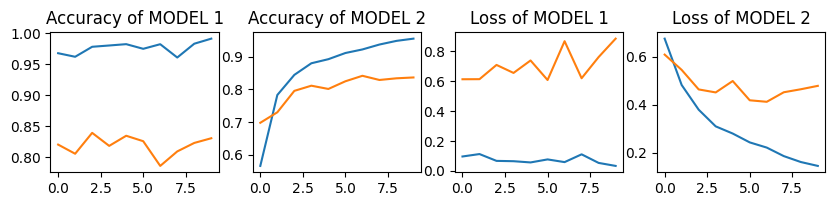

In [43]:
plt.figure(figsize=(10,4))
plt.subplot(2,4,1)
plt.title('Accuracy of MODEL 1')
plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])
plt.subplot(2,4,2)
plt.title('Accuracy of MODEL 2')
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.subplot(2,4,3)
plt.title('Loss of MODEL 1')
plt.plot(history_model_1.history['loss'])
plt.plot(history_model_1.history['val_loss'])
plt.subplot(2,4,4)
plt.title('Loss of MODEL 2')
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
